In [97]:
from IPython.display import Audio
import matplotlib.pyplot as plt 
import numpy as np
import librosa
from scipy.fftpack import fftfreq, fft,ifft
from scipy import signal

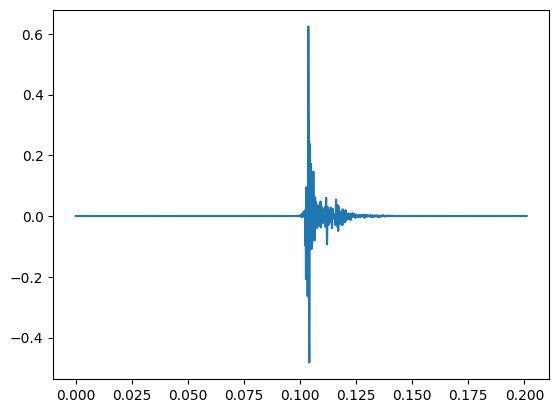

In [98]:
path = 'clap.wav'
window = 200
audio, sample_rate = librosa.load(path)

time = np.linspace(0,(1/sample_rate)*len(audio),len(audio))

plt.plot(time,audio)
plt.show
Audio(audio, rate = sample_rate)

In [99]:
audio_fft = fft(audio)
W = fftfreq(len(audio),1/sample_rate)

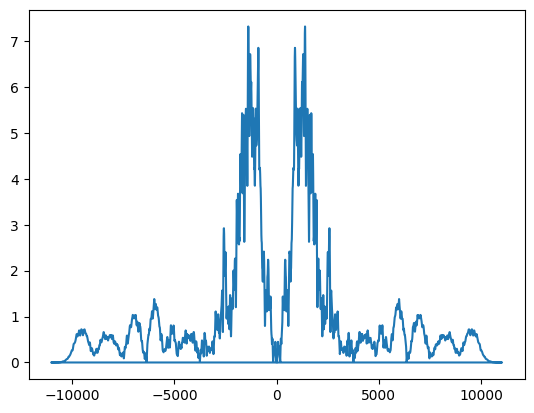

In [100]:
amp = np.abs(audio_fft)
phase = np.angle(audio_fft)
plt.plot(W, magnitude)

In [101]:
def inverse(amp,phase):
    combined=np.multiply(amp,np.exp(1j*phase))
    inverse_combined=ifft(combined)
    signal=np.real(inverse_combined)
    return signal


In [102]:
Audio(inverse(amp,phase), rate = sample_rate)

In [103]:
def get_ranges(mag_fft, W, sample_rate, window):

    sample_period = 1/sample_rate
    clean_freq = []
    fig_f = []
    fig_a = []
    window = window
    average = sum(abs(audio_fft))/len(audio_fft)
    for i in range(len(W)):
        if mag_fft[i] > average/2:
            if not clean_freq:
                clean_freq.append((W[i],W[i]+2*window))
                fig_f.append(W[i])
                fig_a.append(audio_fft[i] )
            if clean_freq:
                if W[i] > clean_freq[-1][1]:
                    clean_freq.append((W[i]-window,W[i]+window))
                    fig_f.append(W[i])
                    fig_a.append(audio_fft[i])
                elif audio_fft[i]> fig_a[-1]:
                    
                    clean_freq.pop(-1)
                    clean_freq.append((W[i]-window,W[i]+window))
                    fig_f.pop(-1)
                    fig_a.pop(-1)
                    fig_f.append(W[i])
                    fig_a.append(audio_fft[i])


    
    plt.plot(W,mag_fft)
    plt.scatter(fig_f,fig_a, color="red")
    return clean_freq

[(735.3339350180505, 1135.3339350180504),
 (1198.0257220216606, 1598.0257220216606),
 (1506.4869133574007, 1906.4869133574007),
 (1755.2459386281587, 2155.245938628159),
 (1994.0546028880863, 2394.0546028880863),
 (2387.093862815884, 2787.093862815884),
 (2775.157942238267, 3175.157942238267),
 (3322.4277978339346, 3722.4277978339346),
 (3869.6976534296027, 4269.697653429603),
 (4247.811371841155, 4647.811371841155),
 (4894.584837545126, 5294.584837545126),
 (5153.294223826714, 5553.294223826714),
 (5790.117328519856, 6190.117328519856),
 (5994.099729241877, 6394.099729241877),
 (6755.302346570396, 7155.302346570396),
 (6959.284747292419, 7359.284747292419),
 (7924.469765342959, 8324.46976534296),
 (8282.68276173285, 8682.68276173285),
 (9227.967057761733, 9627.967057761733),
 (-9627.967057761733, -9227.967057761733),
 (-8682.68276173285, -8282.68276173285),
 (-8324.46976534296, -7924.469765342959),
 (-7155.302346570396, -6755.302346570396),
 (-6941.369584837545, -6541.369584837545),
 

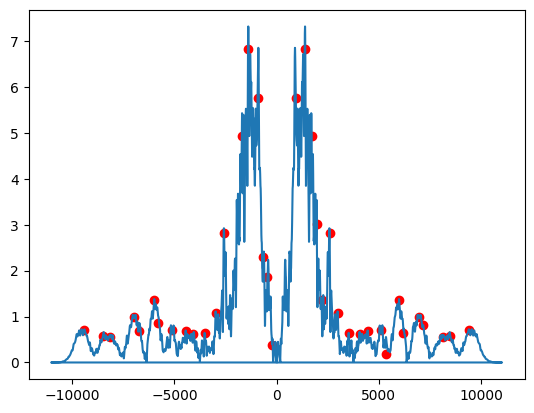

In [104]:
ranges = get_ranges(amp, W,sample_rate,window)
ranges

In [105]:
def remove_ranges(audio_fft, W, ranges,window):
    cuttoff = audio_fft.copy()
    for i in range(len(ranges)):
        cuttoff[((W<ranges[i][1]) & (W>ranges[i][0]))] *= 10**(-20*np.hanning(len(audio_fft[(W>ranges[i][0])&(W<ranges[i][1])]))/20) 
    plt.plot(W,cuttoff)
    return cuttoff

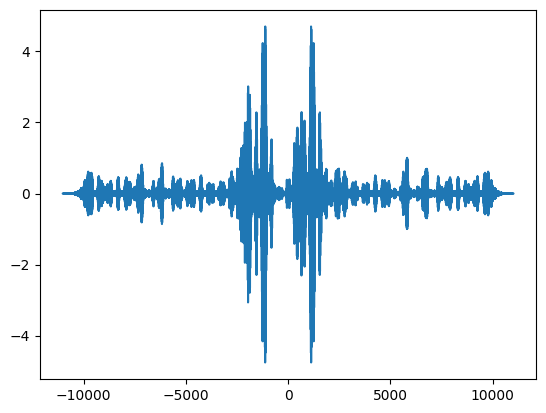

In [106]:
trimed = remove_ranges(audio_fft, W, ranges,window)
audio_final = inverse(trimed,phase)
Audio(audio_final, rate = sample_rate)

In [107]:
def add_ranges(audio_fft, W, ranges,window):
    cuttoff = audio_fft.copy()
    for i in range(len(ranges)):
        cuttoff[((W<ranges[i][1]) & (W>ranges[i][0]))] *= 10**(20*np.hanning(len(audio_fft[(W>ranges[i][0])&(W<ranges[i][1])]))/20) 
    plt.plot(W,cuttoff)
    return cuttoff

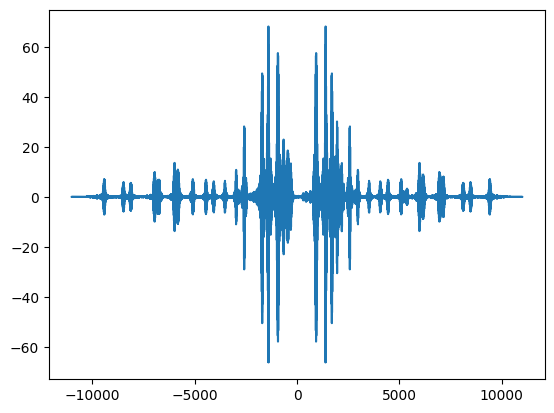

In [108]:
trimed = add_ranges(audio_fft, W, ranges,window)
audio_final = inverse(trimed,phase)
Audio(audio_final, rate = sample_rate)